In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_present=pd.read_excel('modelling_present_KNN.xlsx')

In [4]:
data_present.head()

,Unnamed: 0,Age,Income,Emp_stat_Present,Gender,Marital_status,Loc,Notice_things_Present,All_angles_Present,Sincere_prod_Present,...,Digital_content_Present,Active_Investor_Present,Edu_instit_fee_Present,Change_in_data_consumption,Spend_on_gadgets_Present,Spend_on_Luxury_Present,Track_Household_exp_Present,Domestic_help_Present,Spending_kind_Present,ID
0,0,5,2,0,0,1,1,5,5,5,...,3,2,3,1,4,1,2,1,1,1
1,1,0,3,3,0,0,1,1,5,5,...,1,5,4,2,3,2,0,2,1,3
2,2,4,1,4,0,1,1,5,5,4,...,3,3,3,1,3,2,2,0,0,4
3,3,0,0,2,1,0,1,3,4,4,...,3,3,4,2,4,3,1,0,1,5
4,4,1,0,1,1,0,1,4,5,5,...,2,3,4,2,3,2,2,0,0,6


In [5]:
data_present.drop(columns=['Unnamed: 0','ID'],inplace=True)

In [6]:
from scipy.stats import chi2_contingency

sigini_vars=[]

for i in data_present.columns:
    #contingency table
    table=pd.crosstab(index=data_present[i],columns=data_present['Spending_kind_Present'])
    
    #chi-sqaure goodness of fit test
    stats,p_value,dof,ideal_exp=chi2_contingency(table)
    
    if p_value<0.05:
        sigini_vars.append(i)

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report,confusion_matrix

In [10]:
from imblearn.over_sampling import SMOTE

In [11]:
#significant featues used
X_sig=data_present[sigini_vars].drop(columns='Spending_kind_Present')
y_sig=data_present['Spending_kind_Present']

In [12]:
X_train_signi, X_test_signi, y_train_signi, y_test_signi = train_test_split(X_sig, y_sig, test_size=0.3, random_state=1)

In [13]:
sm = SMOTE(random_state=42) 
X_res_signi, Y_res_signi = sm.fit_sample(X_train_signi, y_train_signi)

In [14]:
Y_res_signi.value_counts() 

2    186
1    186
0    186
Name: Spending_kind_Present, dtype: int64

In [15]:
DT=DecisionTreeClassifier() 

In [17]:
#cross_val_training score
kfold=KFold(shuffle=True,n_splits=3,random_state=0) 
scores=cross_val_score(DT,X_res_signi, Y_res_signi,cv=kfold,scoring='f1_weighted') 

In [18]:
print(scores.mean())
print(scores.var())

0.7069644865073884
0.0007704585599599057


In [19]:
DT.fit(X_res_signi, Y_res_signi)

DecisionTreeClassifier()

In [20]:
pred_bef_signi=DT.predict(X_test_signi)

print(classification_report(y_test_signi,pred_bef_signi))
print('-'*40)
print(confusion_matrix(y_test_signi,pred_bef_signi))

              precision    recall  f1-score   support

           0       0.49      0.62      0.55        42
           1       0.76      0.66      0.71        83
           2       0.40      0.40      0.40        10

    accuracy                           0.63       135
   macro avg       0.55      0.56      0.55       135
weighted avg       0.65      0.63      0.64       135

----------------------------------------
[[26 14  2]
 [24 55  4]
 [ 3  3  4]]


In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

X_train_signi_scale=pd.DataFrame(scaler.fit_transform(X_res_signi),columns=X_train_signi.columns)
X_test_signi_scale=pd.DataFrame(scaler.fit_transform(X_test_signi),columns=X_test_signi.columns)

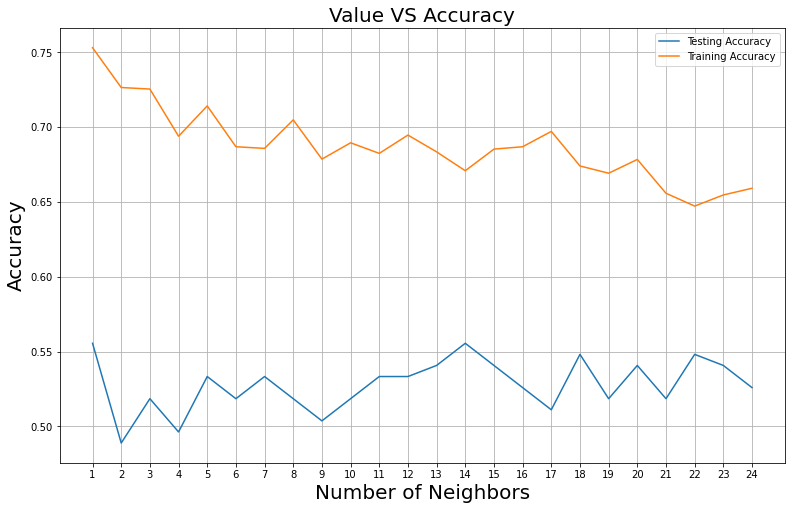

Best accuracy is 0.5555555555555556 with K = 1


In [22]:
# Model complexity
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for i, k in enumerate(neig):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k,metric='hamming')
    
    #cross_val_training score
    kfold=KFold(shuffle=True,n_splits=3,random_state=0)
    scores=cross_val_score(knn,X_train_signi_scale, Y_res_signi,cv=kfold,scoring='f1_weighted')
    mean_score=scores.mean()
    
    #train accuracy
    train_accuracy.append(mean_score)
    
    knn.fit(X_train_signi_scale, Y_res_signi)
    # test accuracy
    test_accuracy.append(knn.score(X_test_signi_scale, y_test_signi))


# Plot
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('Value VS Accuracy',fontsize=20)
plt.xlabel('Number of Neighbors',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.xticks(neig)
plt.grid()
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

In [23]:
KNN_signi=KNeighborsClassifier(n_neighbors=14,metric='hamming')

In [25]:
#cross_val_training score
kfold=KFold(shuffle=True,n_splits=3,random_state=0)
scores=cross_val_score(KNN_signi,X_train_signi_scale, Y_res_signi,cv=kfold,scoring='f1_weighted')

In [26]:
print(scores.mean())
print(scores.var())

0.6708642838932409
0.0005833945612928964


In [27]:
KNN_signi.fit(X_train_signi_scale, Y_res_signi)

KNeighborsClassifier(metric='hamming', n_neighbors=14)

In [28]:
pred_KNN_signi=KNN_signi.predict(X_test_signi_scale) 

print(classification_report(y_test_signi,pred_KNN_signi)) 
print('-'*40) 
print(confusion_matrix(y_test_signi,pred_KNN_signi)) 

              precision    recall  f1-score   support

           0       0.48      0.69      0.56        42
           1       0.75      0.48      0.59        83
           2       0.29      0.60      0.39        10

    accuracy                           0.56       135
   macro avg       0.51      0.59      0.51       135
weighted avg       0.63      0.56      0.57       135

----------------------------------------
[[29 10  3]
 [31 40 12]
 [ 1  3  6]]


In [29]:
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier,RandomForestClassifier

In [30]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [32]:

DT2= DecisionTreeClassifier(criterion = 'entropy',random_state=0 )
RF2=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
DT_boost2=AdaBoostClassifier(n_estimators=50,random_state=0)
RF_boost2=AdaBoostClassifier(base_estimator=RF,n_estimators=50,random_state=0)
GBoost2=GradientBoostingClassifier(n_estimators=50,random_state=0)



models2=[]
models2.append(('DecisionTree',DT2))
models2.append(('RandomForest',RF2))
models2.append(('BoostedDT',DT_boost2))
models2.append(('BoostedRF',RF_boost2))
models2.append(('GradientBoost',GBoost2))


DecisionTree: 0.309380 (0.000101)
RandomForest: 0.259940 (0.001099)
BoostedDT: 0.313865 (0.005831)
BoostedRF: 0.189371 (0.001417)
GradientBoost: 0.240118 (0.000655)


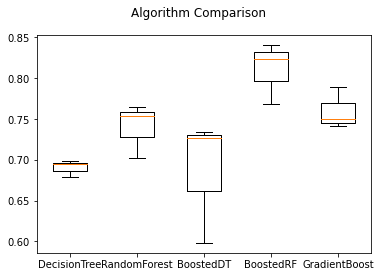

In [34]:
from sklearn import model_selection

# evaluate each model in turn
results2 = []
names2 = []
for name, model in models2:
	kfold = model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
	cv_results = model_selection.cross_val_score(model, X_res_signi, Y_res_signi,cv=kfold, scoring='f1_weighted')
	results2.append(cv_results)
	names2.append(name)
	print("%s: %f (%f)" % (name, 1-np.mean(cv_results),np.var(cv_results,ddof=1)))
   # boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results2)
ax.set_xticklabels(names2)
plt.show()


In [35]:
RF_all=RandomForestClassifier()

In [36]:
from sklearn.model_selection import GridSearchCV

RF_all=RandomForestClassifier()

param={'criterion':['gini','entropy'],'n_estimators':range(10,101),"max_depth":range(5,25)}

GS_all=GridSearchCV(RF_all,param,cv=3,scoring='f1_weighted')

GS_all.fit(X_res_signi, Y_res_signi)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(5, 25),
                         'n_estimators': range(10, 101)},
             scoring='f1_weighted')

In [37]:
GS_all.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=17, n_estimators=65)

In [38]:
RF_signi=RandomForestClassifier(criterion='entropy', max_depth=17, n_estimators=65)

In [39]:
RF_signi.fit(X_res_signi, Y_res_signi)

RandomForestClassifier(criterion='entropy', max_depth=17, n_estimators=65)

In [40]:
#cross_val_training score
kfold=KFold(shuffle=True,n_splits=3,random_state=0)
scores=cross_val_score(RF_signi, X_res_signi, Y_res_signi,cv=kfold,scoring='f1_weighted')

In [41]:
print(scores.mean())
print(scores.var())

0.7871933927365404
0.00043526426946728885


In [42]:
pred_RF_signi=RF_signi.predict(X_test_signi) 

print(classification_report(y_test_signi,pred_RF_signi)) 
print('-'*40) 
print(confusion_matrix(y_test_signi,pred_RF_signi)) 

              precision    recall  f1-score   support

           0       0.50      0.52      0.51        42
           1       0.71      0.71      0.71        83
           2       0.25      0.20      0.22        10

    accuracy                           0.61       135
   macro avg       0.49      0.48      0.48       135
weighted avg       0.61      0.61      0.61       135

----------------------------------------
[[22 18  2]
 [20 59  4]
 [ 2  6  2]]


In [43]:
RF_boost_signi=AdaBoostClassifier(base_estimator=RF_signi,n_estimators=25)

In [44]:
#cross_val_training score
kfold=KFold(shuffle=True,n_splits=3,random_state=0)
scores=cross_val_score(RF_boost_signi, X_res_signi, Y_res_signi,cv=kfold,scoring='f1_weighted')

In [45]:
print(scores.mean())
print(scores.var())

0.7906325397719494
2.834535537903035e-05


In [46]:
RF_boost_signi.fit(X_res_signi, Y_res_signi)

AdaBoostClassifier(base_estimator=RandomForestClassifier(criterion='entropy',
                                                         max_depth=17,
                                                         n_estimators=65),
                   n_estimators=25)

In [47]:
pred_RF_boost_signi=RF_boost_signi.predict(X_test_signi) 

print(classification_report(y_test_signi,pred_RF_boost_signi)) 
print('-'*40) 
print(confusion_matrix(y_test_signi,pred_RF_boost_signi)) 

              precision    recall  f1-score   support

           0       0.51      0.55      0.53        42
           1       0.72      0.70      0.71        83
           2       0.33      0.30      0.32        10

    accuracy                           0.62       135
   macro avg       0.52      0.52      0.52       135
weighted avg       0.62      0.62      0.62       135

----------------------------------------
[[23 17  2]
 [21 58  4]
 [ 1  6  3]]


In [48]:
X=data_present[sigini_vars].drop(columns='Spending_kind_Present')
y=data_present['Spending_kind_Present']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [50]:
GBoost_signi=GradientBoostingClassifier(n_estimators=50)

In [51]:
#cross_val_training score
kfold=KFold(shuffle=True,n_splits=3,random_state=0)
scores=cross_val_score(GBoost_signi, X_train, y_train,cv=kfold,scoring='f1_weighted')

In [52]:
print(scores.mean())
print(scores.var())

0.6001199786533244
0.0013467682743271833


In [53]:
GBoost_signi.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=50)

In [54]:
pred_GBoost_signi = GBoost_signi.predict(X_test) 

print(classification_report(y_test,pred_GBoost_signi)) 
print('-'*40) 
print(confusion_matrix(y_test,pred_GBoost_signi)) 

              precision    recall  f1-score   support

           0       0.60      0.48      0.53        44
           1       0.70      0.83      0.76        81
           2       0.75      0.30      0.43        10

    accuracy                           0.67       135
   macro avg       0.68      0.53      0.57       135
weighted avg       0.67      0.67      0.66       135

----------------------------------------
[[21 23  0]
 [13 67  1]
 [ 1  6  3]]


In [ ]:
from sklearn.model_selection import GridSearchCV

RF_all=RandomForestClassifier() 

param={'criterion':['gini','entropy'],'n_estimators':range(10,101),"max_depth":range(5,25)} 

GS_all=GridSearchCV(RF_all,param,cv=3,scoring='f1_weighted') 

GS_all.fit(X_train,y_train) 